In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt

/Users/ankit/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/ankit/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_data():
    return train_test_split(*pd.read_csv('ds1.csv').as_matrix().T)
    

In [3]:
def build_model(layers=[32,32,32],final_activation='linear'):
    inp = keras.Input(shape=(1,))
    l = inp
    for count in layers:
        l = keras.layers.Dense(32,activation='relu')(l)
    l = keras.layers.Dense(1,activation=final_activation)(l)
    m = keras.Model(inputs=inp, outputs=l)
    m.compile(optimizer='adam',loss='mse',metrics=['mae'])
    return m

In [4]:
def plot_acc(x,y,m):
    plt.plot(x,y,'bo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,m.predict(x),'r+')
    plt.show()


2500/2500 [==============================] - 0s 141us/step


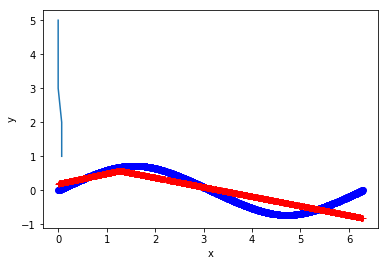

[0.28518780042392633, 0.1041477562161442, 0.08058272530367604, 0.07662243669268162, 0.07566812190950385, 0.0750425007452105, 0.07467620740522304, 0.07473432146592018, 0.07443674696490898, 0.07413226140260394]
2500/2500 [==============================] - 0s 162us/step


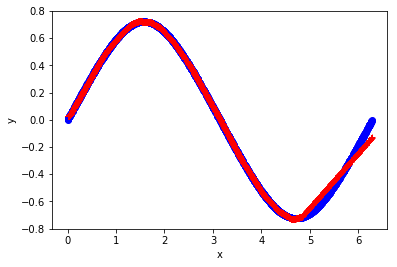

[0.14779080471126005, 0.04043286513939057, 0.032527661025534074, 0.026654236837585683, 0.02072229876721598, 0.014982874680116498, 0.00983378934939862, 0.005458909510008286, 0.002550969967419379, 0.0012219002974162615]
2500/2500 [==============================] - 0s 186us/step


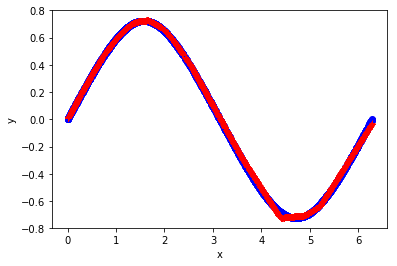

[0.12208213555948355, 0.041190708805969006, 0.03002679483064144, 0.017425385605894572, 0.007823209404962264, 0.0023844433151048155, 0.0007933107465144509, 0.0003582984700146572, 0.00020513423309634094, 0.0001773489125586556]
2500/2500 [==============================] - 0s 185us/step


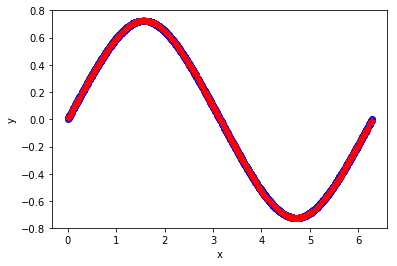

[0.08489909343389666, 0.03106315419721689, 0.022935202265520194, 0.011608314870444754, 0.0012293334460432063, 7.305202410861238e-05, 1.4443258992130096e-05, 1.3909000562167888e-05, 7.818648507715228e-06, 9.863523726202136e-06]
2500/2500 [==============================] - 0s 179us/step


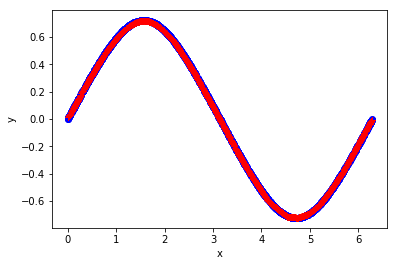

[0.0657093916612359, 0.0015617871685870309, 0.00023388180522686795, 3.3306521035308725e-05, 9.283931571106697e-05, 1.313384883894176e-05, 2.0256233783715304e-05, 4.3643287995003735e-05, 9.905257804898017e-05, 0.0002832057303862545]


In [14]:
layer_count = []
loss = []

layers = []
for i in range(5):
    layers.append(32)
    x_train,x_test,y_train,y_test = get_data()
    m = build_model(layers=layers)
    m.fit(x_train,y_train,epochs=10,verbose=0)
    m.evaluate(x_test,y_test)
    plot_acc(x_test,y_test,m)
    print(m.history.history['loss'])
    layer_count.append(len(layers))
    loss.append(m.history.history['loss'][-1])
    

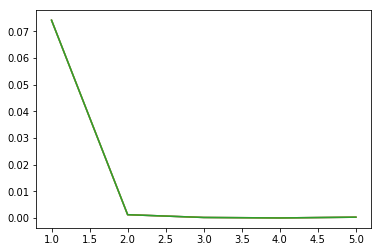

In [17]:
plt.plot(layer_count,loss)
plt.show()

In [20]:
layer_count[1],loss[1]

(2, 0.0012219002974162615)

In [21]:
layer_count

[1, 2, 3, 4, 5]